![Lab 5](https://pbs.twimg.com/media/FO8N8mgXwAMdK8D?format=jpg&name=large)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

### Generate Dataset 1

In [9]:
def generate_dataset_1(m = 3, n = 500):
    x1_0 = np.random.normal(0,1,n)
    x2_0 = np.random.normal(0,1,n)

    x1_1 = np.random.normal(m,1,n)
    x2_1 = np.random.normal(m,1,n)

    cls_0 = [-1]*500 
    cls_1 = [1]*500 

    x1 = np.concatenate((x1_0, x1_1))
    x2 = np.concatenate((x2_0, x2_1))
    cls = np.concatenate((cls_0, cls_1))
    
    return x1, x2, cls

#### Visualize Dataset 1

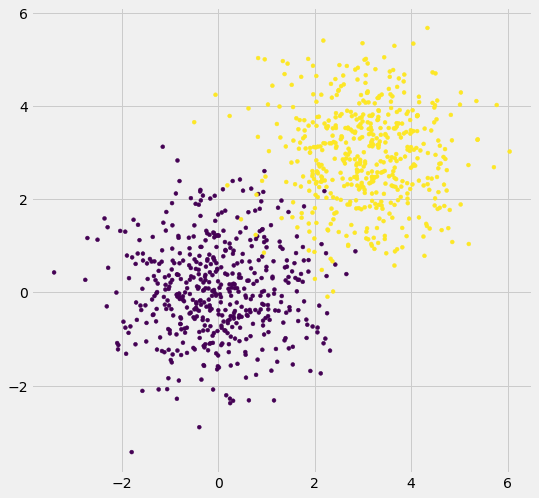

In [8]:
plt.style.use('fivethirtyeight')
x1, x2, cls = generate_dataset_1()
plt.figure(figsize=(8,8))
plt.scatter(x1, x2, s=15, c=cls)

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Generate Dataset 2

In [10]:
def generate_dataset_2(noise = 0.01, n = 500):

    noise = np.random.multivariate_normal(np.zeros([1]), np.eye(1) * noise, size=n)
    
    x1_0 = np.random.uniform(-2,2,n)
    x2_0 = np.random.choice([-1,1], n) * np.sqrt(4 - x1_0**2)
    x2_0 += noise.reshape(500)
    
    x1_1 = np.random.uniform(-1,1,n)
    x2_1 = np.random.choice([-1,1],n) * np.sqrt(1 - x1_1**2) #+ noise
    x2_1 += noise.reshape(500)

    cls_0 = [-1]*500 
    cls_1 = [1]*500 

    x1 = np.concatenate((x1_0, x1_1))
    x2 = np.concatenate((x2_0, x2_1))
    cls = np.concatenate((cls_0, cls_1))
    
    return x1, x2, cls

#### Visualize Dataset 2

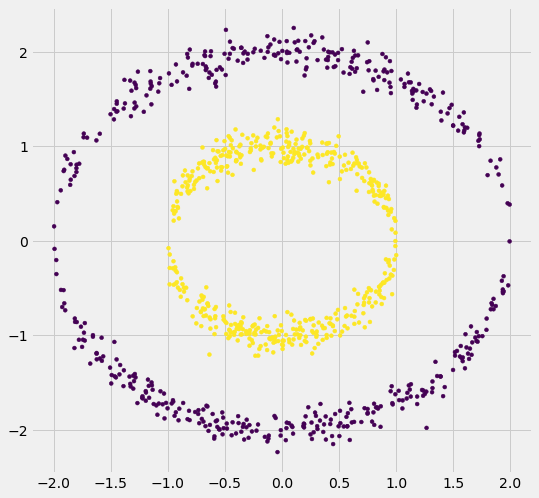

In [11]:
x1, x2, cls = generate_dataset_2(n=500, noise=0.01)
plt.figure(figsize=(8,8))
plt.scatter(x1, x2, s=15, c = cls)

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Task 

In [16]:
def SVM_Model(x, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(x, y)
    y_pred = clf.predict(x)
    print("accuracy", np.mean(y_pred==y))
    return y_pred

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### For Dataset 1

SVM with linear kernel and m=0.5
accuracy 0.63


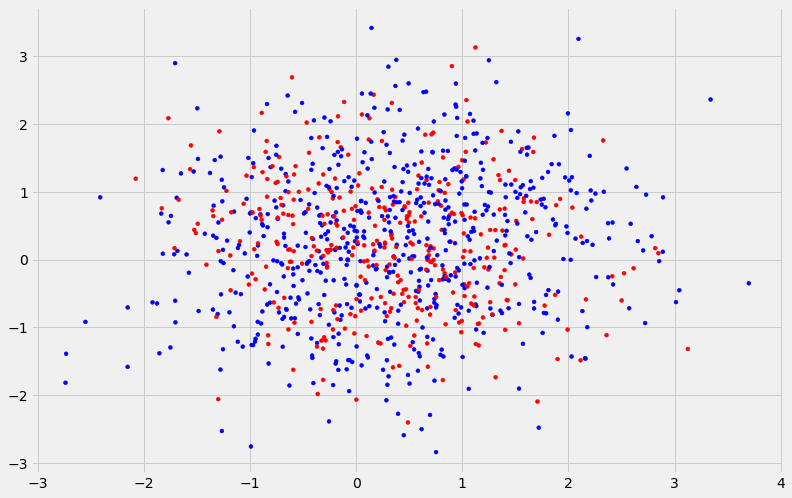

SVM with poly kernel and m=0.5
accuracy 0.597


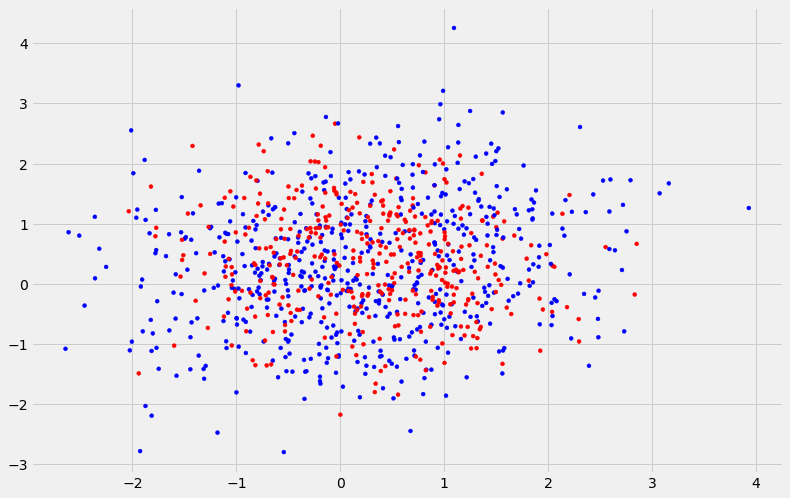

SVM with rbf kernel and m=0.5
accuracy 0.632


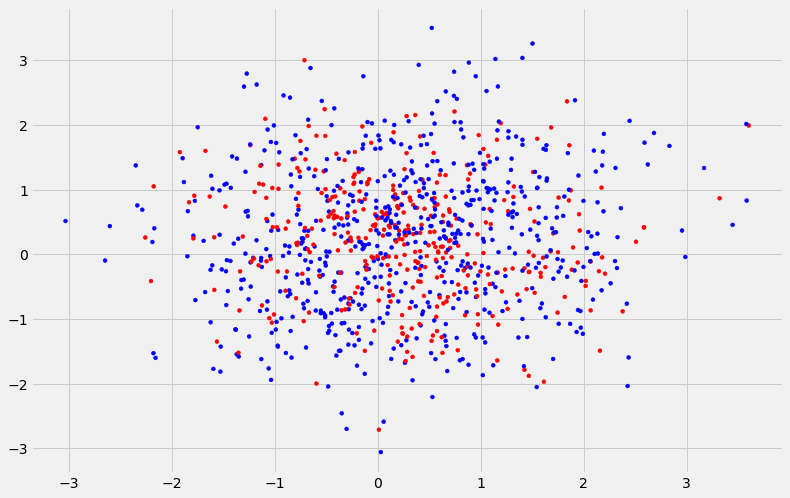

SVM with linear kernel and m=1
accuracy 0.792


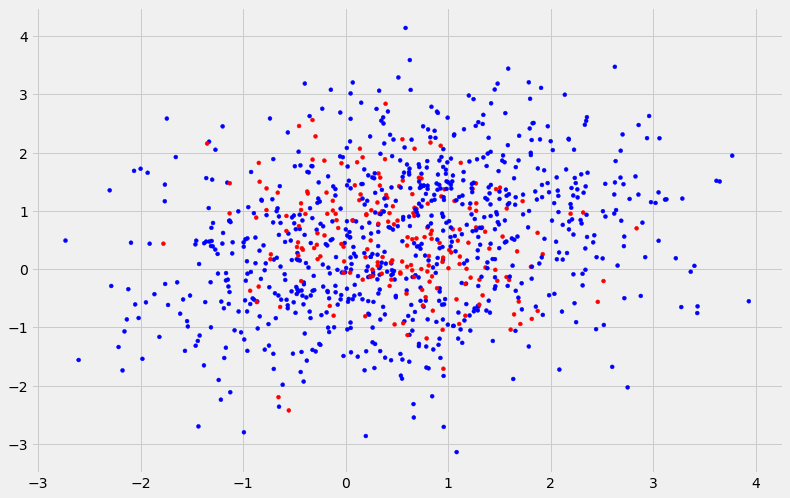

SVM with poly kernel and m=1
accuracy 0.733


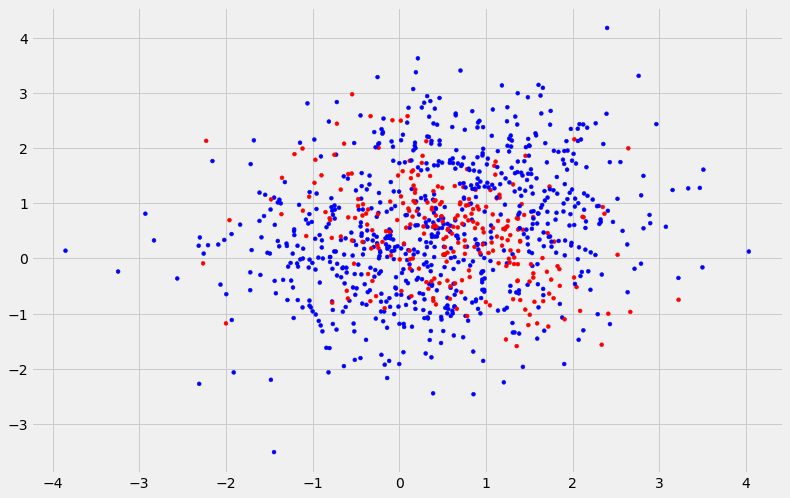

SVM with rbf kernel and m=1
accuracy 0.765


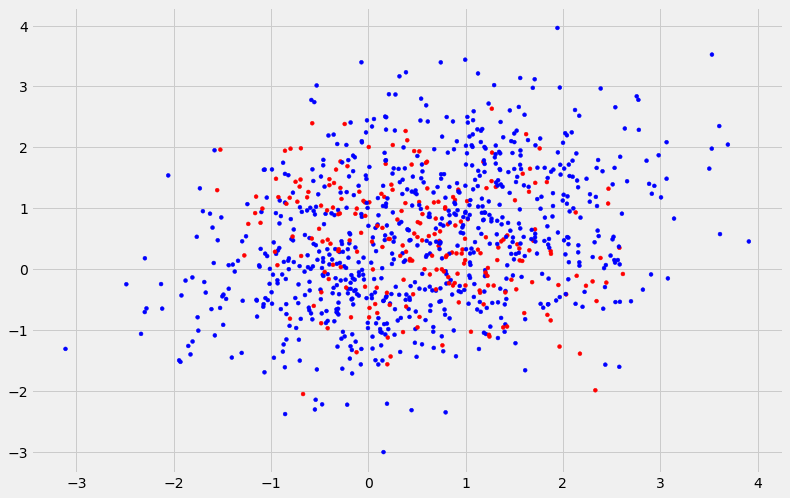

SVM with linear kernel and m=2
accuracy 0.922


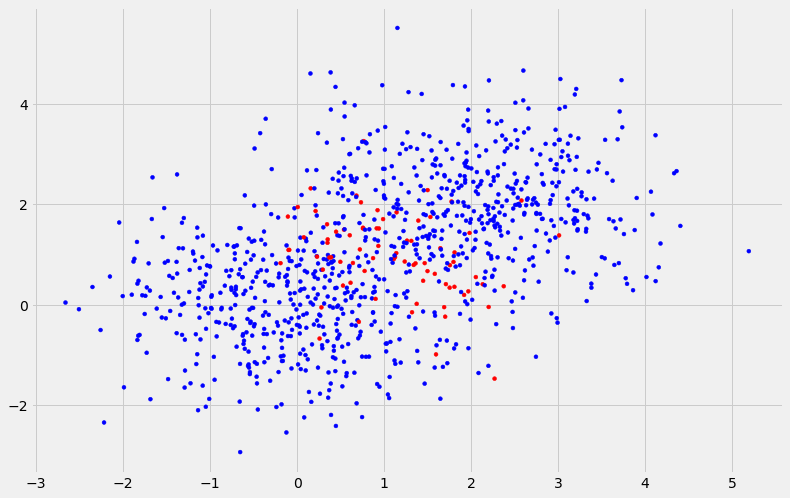

SVM with poly kernel and m=2
accuracy 0.909


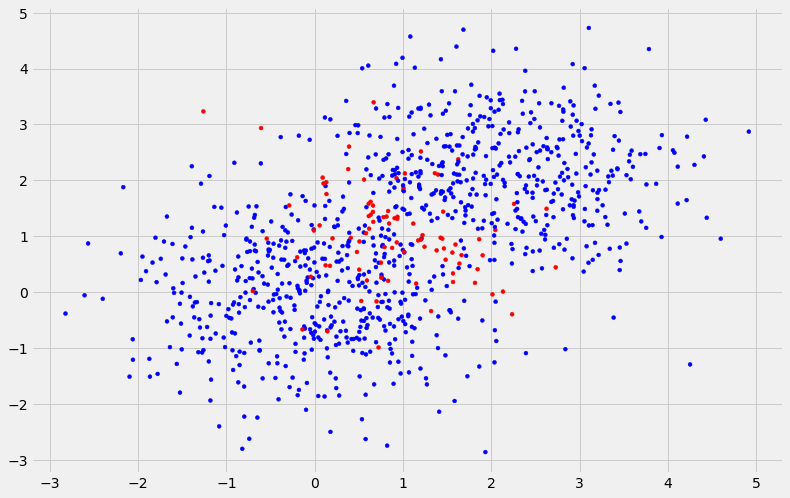

SVM with rbf kernel and m=2
accuracy 0.922


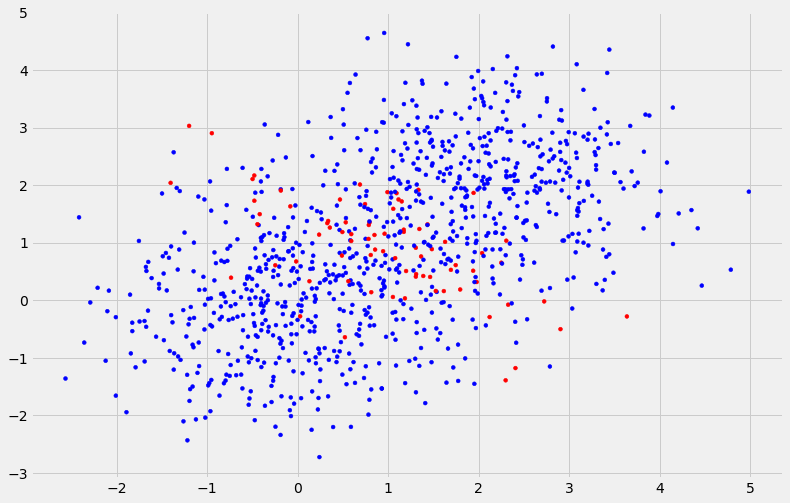

SVM with linear kernel and m=3
accuracy 0.98


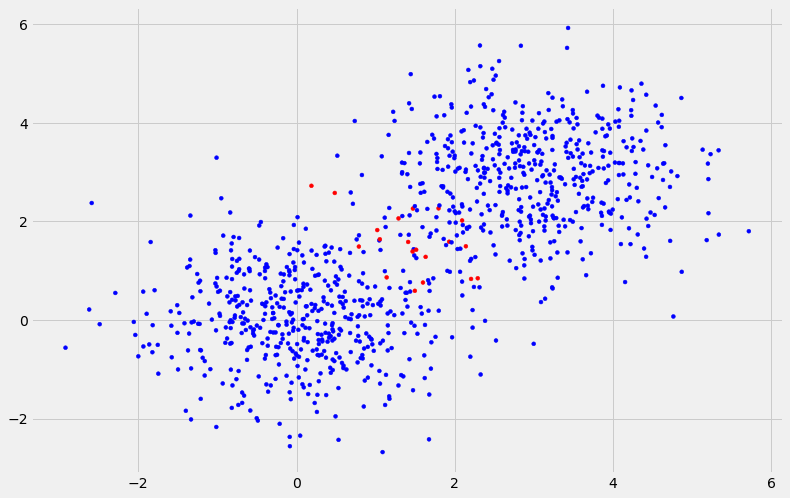

SVM with poly kernel and m=3
accuracy 0.987


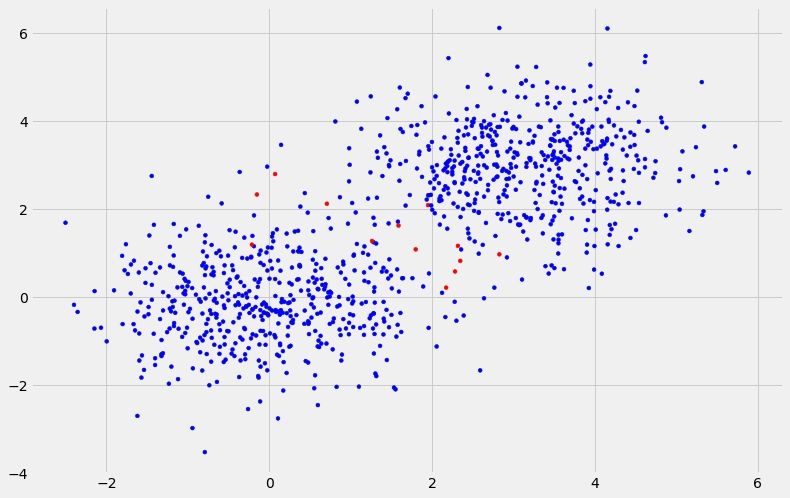

SVM with rbf kernel and m=3
accuracy 0.974


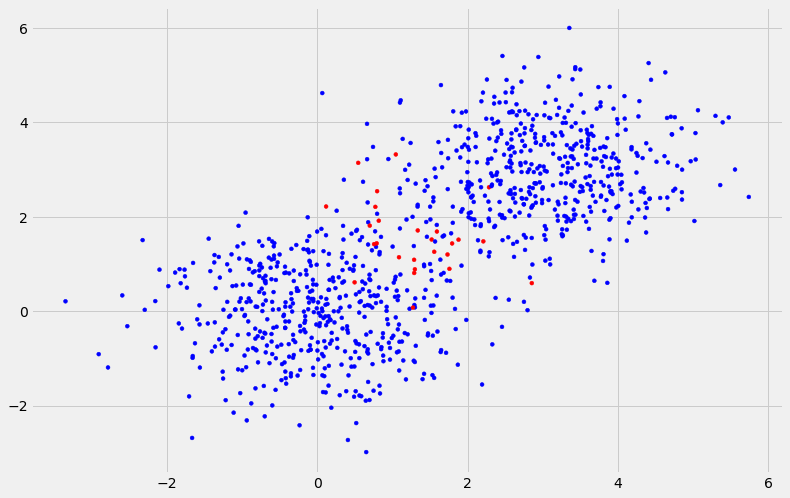

In [22]:
for m in [0.5, 1, 2, 3]:
    for kernel in ['linear', 'poly', 'rbf']:
        print('SVM with ' + kernel + ' kernel and m=' + str(m))
        x1, x2, cls = generate_dataset_1(m=m)
        y_pred = SVM_Model(np.c_[x1,x2], cls, kernel)

        color_array = y_pred == cls
        c = np.array(['blue']*1000)
        np.place(c, color_array == 0, 'red')


        plt.figure(figsize=(12,8))
        plt.scatter(x1, x2, s=15, c = c)
        plt.show()

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### For Dataset 2

SVM with linear kernel and var of noise=0.1
accuracy 0.563


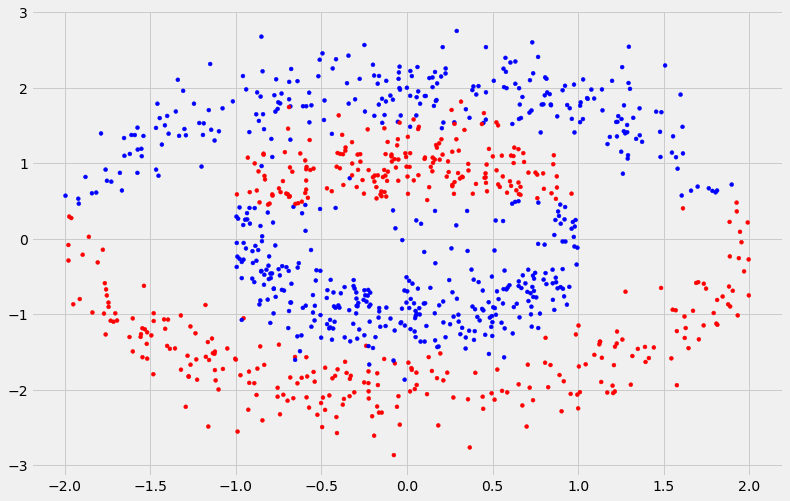

SVM with poly kernel and var of noise=0.1
accuracy 0.62


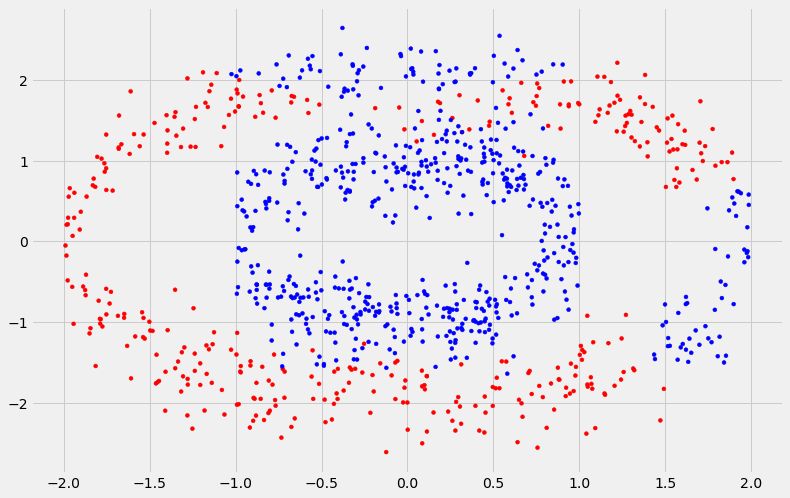

SVM with rbf kernel and var of noise=0.1
accuracy 0.983


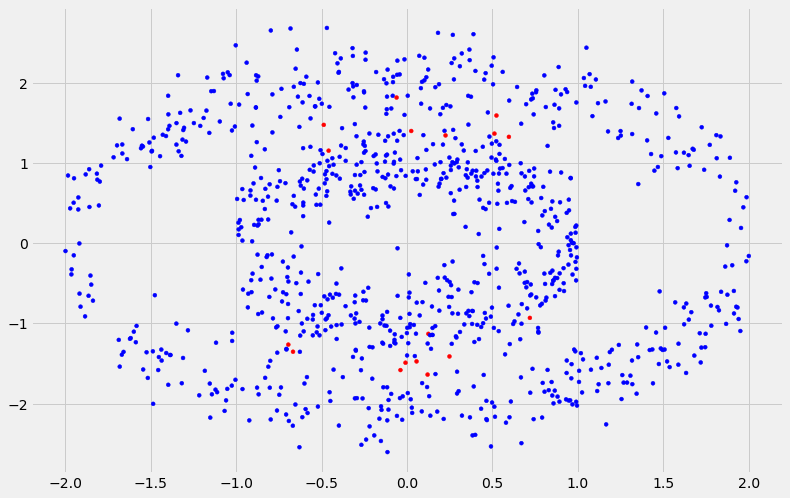

SVM with linear kernel and var of noise=0.01
accuracy 0.575


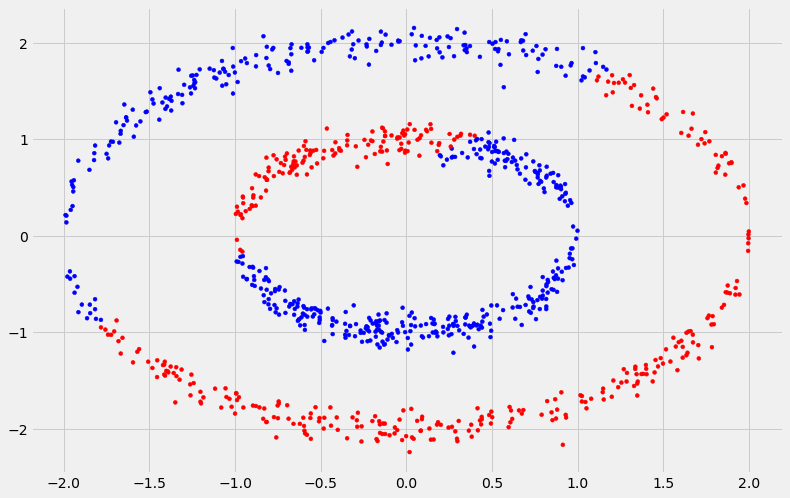

SVM with poly kernel and var of noise=0.01
accuracy 0.742


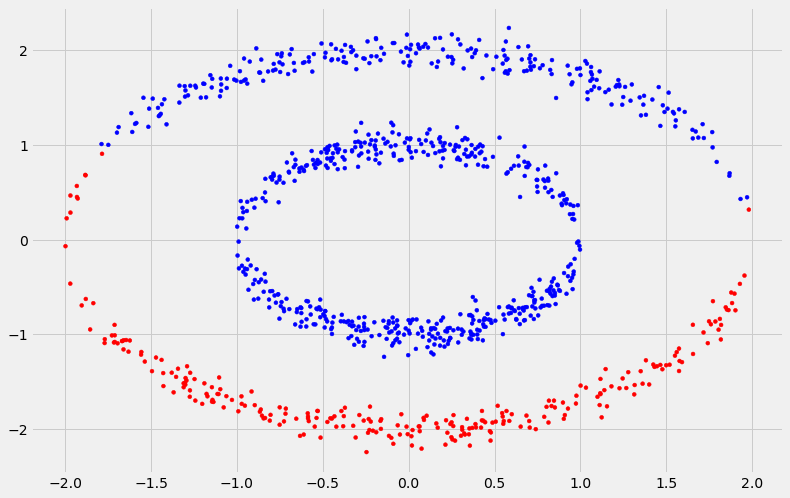

SVM with rbf kernel and var of noise=0.01
accuracy 1.0


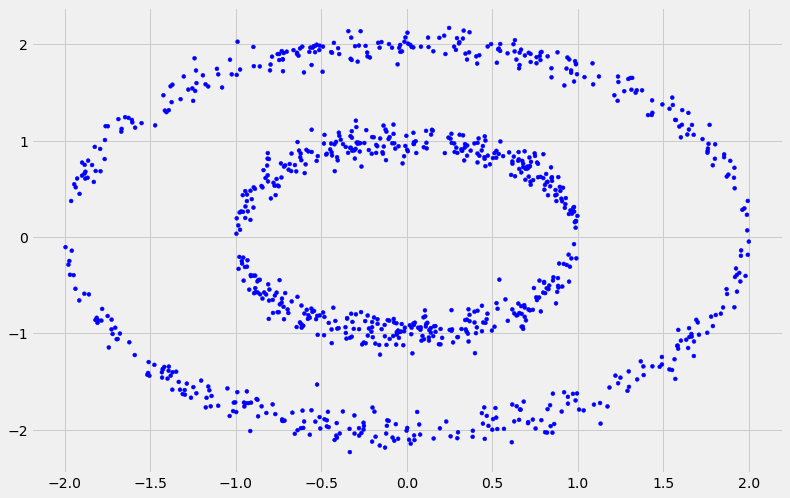

SVM with linear kernel and var of noise=0.001
accuracy 0.541


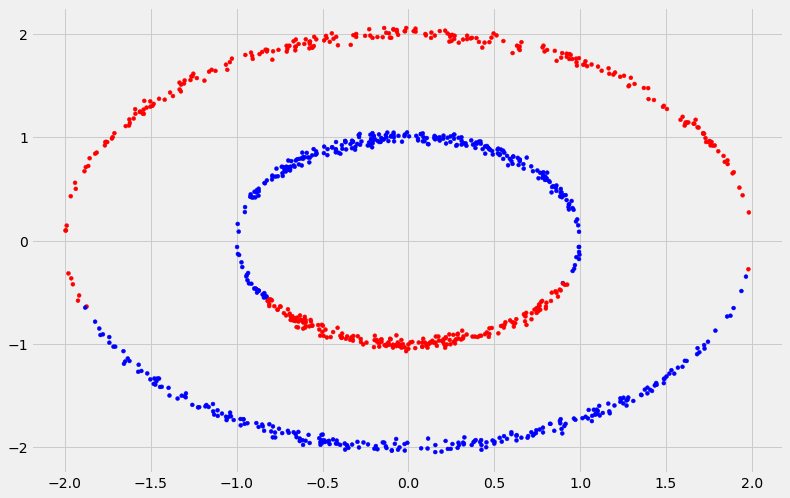

SVM with poly kernel and var of noise=0.001
accuracy 0.712


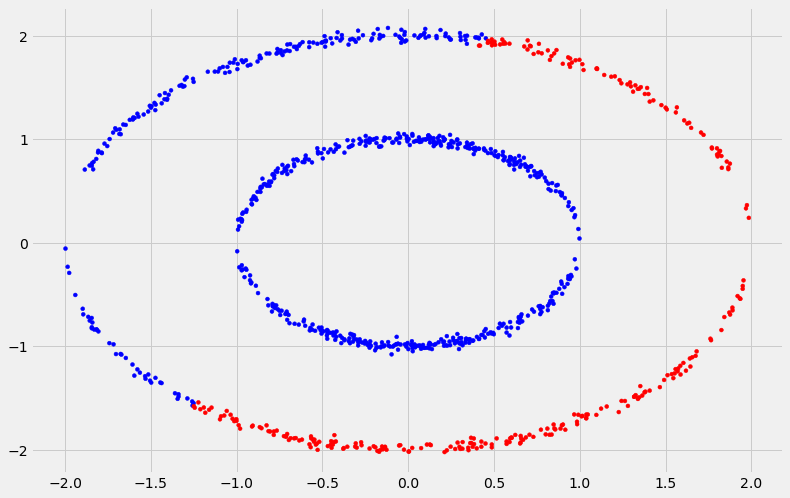

SVM with rbf kernel and var of noise=0.001
accuracy 1.0


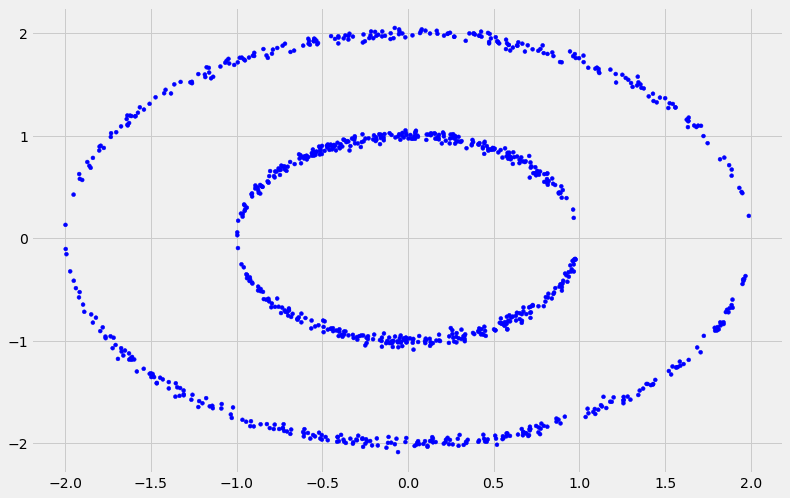

In [24]:
for noise in [0.1, 0.01, 0.001]:
    for kernel in ['linear', 'poly', 'rbf']:
        print('SVM with ' + kernel + ' kernel and var of noise=' + str(noise))
        x1, x2, cls = generate_dataset_2(noise=noise)
        y_pred = SVM_Model(np.c_[x1,x2], cls, kernel)

        color_array = y_pred == cls
        c = np.array(['blue']*1000)
        np.place(c, color_array == 0, 'red')


        plt.figure(figsize=(12,8))
        plt.scatter(x1, x2, s=15, c = c)
        plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)